<a href="https://colab.research.google.com/github/adityadutt09/Phys498Projects/blob/main/Phys498_Project2_Statistical_Mechanics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy.linalg as la

### **Defining an Ising Model**

1. Defining the State and Parameters

In [ ]:
#Representing the State of our Spins in an L X L Array
L = 3
# spins = np.random.choice([1,-1],(L,L))
spins = np.ones((L,L))
spins

2. Computing the Energy 

In [ ]:
def Energy(spins):
  E = 0
  sum = 0
  L = len(spins)
  c = spins
  for i in range(L):
    for j in range(L):
      s = spins[i,j]
      neigh = c[(i+1)%L, j] + c[(i-1)%L, j] + c[i, (j+1)%L] + c[i, (j-1)%L]
      sum = sum + (-neigh*s)
  E = sum
  return E/4

In [ ]:
def deltaE(spin_to_flip, spins):
  L = len(spins)

  #O(1) form
  i, j = spin_to_flip
  neighbours = spins[(i+1)%L, j] + spins[(i-1)%L, j] + spins[i, (j+1)%L] + spins[i, (j-1)%L]
  return -2*spins[i,j]*neighbours

In [ ]:
#Testing
temp = np.random.choice([-1,1],(27,27))
# print(temp)
e1 = Energy(temp)
temp[2,1] = -1*temp[2,1]
e2 = Energy(temp)

print(e1, e2, e2 - e1)
print(deltaE((2,1), temp))

### **Monte-Carlo Simluation**

In [ ]:
#1. Choose a new configuration c' : Choose a random spin and flip it.
#2. Find deltaE
#3.If exp(-beta*deltaE) > ran(0,1) then accept the new c'. Otherwise leave the old configuration c.

def MonteCarloStep(C, beta):
  L = len(C)
  delE = 0.0

  #Choose c':
  i = np.random.randint(0, L)
  j = np.random.randint(0, L)
  s = C[i,j]

  #Find delE:
  delE = deltaE((i,j), C)

  #Check condition:
  if(np.exp(-beta*delE) > np.random.random()):
    s = -1*s

  #Store new state
  C[i,j] = s

  return C

def simulate(bJ, spins):
  config_list = []
  ctr = 0
  c = spins
  N = len(spins)**2
  for sweep in range(0,10000):
      
      #Monte Carlo Step
      for step in range(0,N):
        c = MonteCarloStep(c, bJ)
          
      if(ctr >=20):
        config_list.append(c)

      ctr = ctr + 1

  plt.figure()
  plt.imshow(c)
  return config_list    

def ConfigToInt(config_list):
  #Creating the integers to plot histogram
  integers = []
  binary_str = ''
  flattened_list = [c.flatten() for c in config_list]
  for config in flattened_list:
    binary_str = ''
    config = [int(x) if x == 1 else 0 for x in config]
    
    for i in range(len(config)):
      binary_str = binary_str + str(config[i])
    
    integers.append(int(binary_str, 2))

  return integers

Creating a Faster MonteCarlo Simulation Routine

In [ ]:
#Computes delE and implements MonteCarlo implicitly.
def fastSimulate(b, spins, sweeps):
  ctr = 0
  config = [np.eye(len(spins))]*(sweeps - 20)
  s = np.copy(spins)
  for sweep in range(sweeps):
    #For green:
    gtoFlip=1.0/(1.0+1.0/np.exp(-b*delE_fast(s, green)))<np.random.random(np.shape(np.exp(-b*delE_fast(s, green))))
    gtoFlip_int = [-1 if x == True else 1 for x in gtoFlip]
    s[green] = gtoFlip_int*s[green]
    
    #For red:
    rtoFlip=1.0/(1.0+1.0/np.exp(-b*delE_fast(s, red)))<np.random.random(np.shape(np.exp(-b*delE_fast(s, red))))
    rtoFlip_int = [-1 if x == True else 1 for x in rtoFlip]
    s[red] = rtoFlip_int*s[red]

    #For yellow:
    ytoFlip=1.0/(1.0+1.0/np.exp(-b*delE_fast(s, yellow)))<np.random.random(np.shape(np.exp(-b*delE_fast(s, yellow))))
    ytoFlip_int = [-1 if x == True else 1 for x in ytoFlip]
    s[yellow] = ytoFlip_int*s[yellow]

    #For blue:
    btoFlip=1.0/(1.0+1.0/np.exp(-b*delE_fast(s, blue)))<np.random.random(np.shape(np.exp(-b*delE_fast(s, blue))))
    btoFlip_int = [-1 if x == True else 1 for x in btoFlip]
    s[blue] = btoFlip_int*s[blue]

    if(ctr >= 20):
      config[ctr-20] = np.copy(s)

    ctr = ctr+1

  plt.figure()
  plt.imshow(s)
  return config

## **Extra Credit**

In [ ]:
#Extra Credit
# This is for a L x L lattice
L = 81
x,y =    np.indices((L,L))
red =    np.logical_and((x+y) % 2==0   , np.logical_and(x<L-1,y<L-1))
red[L-1,L-1] =   True
blue =   np.logical_and((x+y) % 2==1   , np.logical_and(x<L-1,y<L-1))
green =  np.logical_and((x+y) % 2==0   , np.logical_or(x==L-1,y==L-1))
green[L-1,L-1] = False
yellow = np.logical_and((x+y) % 2==1   , np.logical_or(x==L-1,y==L-1))

In [ ]:
def delE_fast(spins, color):
  left_neigh = np.roll(spins, -1, axis = 1)
  right_neigh = np.roll(spins, 1, axis = 1)
  top_neigh = np.roll(spins, -1, axis = 0)
  bot_neigh = np.roll(spins, 1, axis = 0)

  return -2*spins[color]*(left_neigh[color] + right_neigh[color] + top_neigh[color] + bot_neigh[color])

In [ ]:
spin = np.random.choice([1,-1],(L,L))
print(spin)

In [ ]:
!pip install ipython-autotime
%load_ext autotime

In [ ]:
sim_models = fastSimulate(0, spin, 10000)

In [ ]:
plt.imshow(sim_models[0])

## **Simulating the Ising Model**

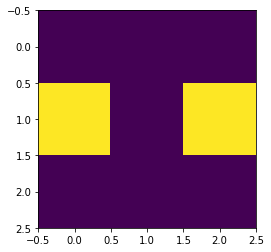

time: 1.68 s (started: 2022-03-25 14:44:42 +00:00)


In [ ]:
#Initial config
L = 3
beta = 0.3
#spins = np.ones((3,3))
spins = np.random.choice([1,-1], (L,L))

integers = ConfigToInt(simulate(beta, spins))

In [ ]:
#Plot the theory grpah as well.
spin_matrix = []
conf = []
for i in range(2**9):
  binary = '{0:09b}'.format(i)
  ints = [int(x) for x in binary]
  conf = [1 if v == 1 else -1 for v in ints]
  conf_array = np.asarray(conf)
  spin_matrix.append(conf_array.reshape(3,3))

energies = [Energy(c) for c in spin_matrix]

time: 21.9 ms (started: 2022-03-25 14:44:52 +00:00)


In [ ]:
theoretical_values = [np.exp(-beta*energy) for energy in energies]
theory_normed = theoretical_values/np.sum(theoretical_values)

time: 4.29 ms (started: 2022-03-25 14:44:53 +00:00)


(0.0, 1.0)

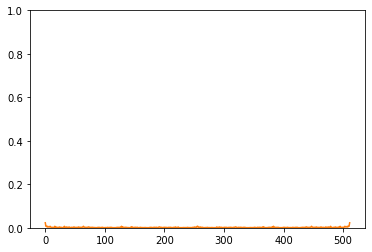

time: 247 ms (started: 2022-03-25 14:44:54 +00:00)


In [ ]:
plt.hist(integers, density = True)
plt.plot(theory_normed, '-')
plt.ylim(0,1)

## **Measuring the Ising Model**

In [ ]:
def MagnetizationSq(spins):
  N = len(spins)**2
  return ((1/N)*np.sum(spins))**2

time: 5.96 ms (started: 2022-04-15 14:54:44 +00:00)


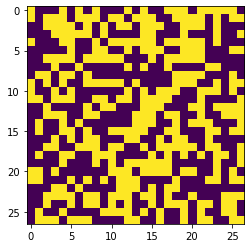

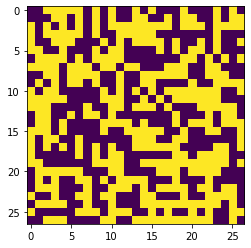

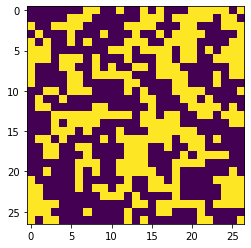

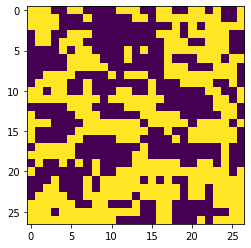

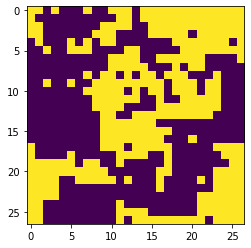

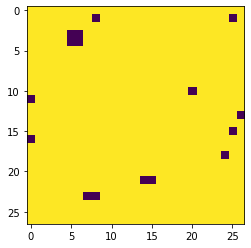

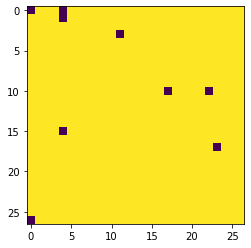

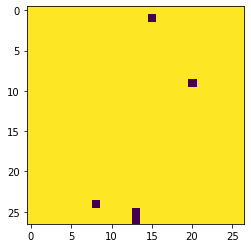

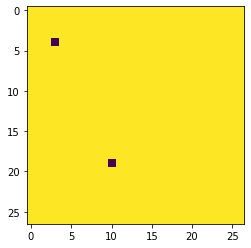

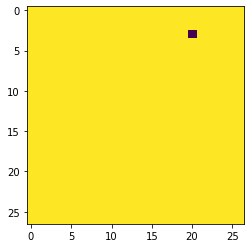

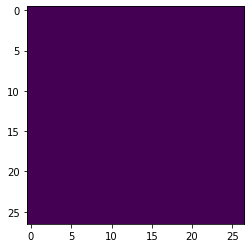

time: 3min 21s (started: 2022-04-04 22:54:23 +00:00)


In [ ]:
#snapshot
#Creating the indices for fast simulation
L = 27
x,y=np.indices((L,L))
red=np.logical_and((x+y) % 2==0   , np.logical_and(x<L-1,y<L-1))
red[L-1,L-1]=True
blue=np.logical_and((x+y) % 2==1   , np.logical_and(x<L-1,y<L-1))
green=np.logical_and((x+y) % 2==0   , np.logical_or(x==L-1,y==L-1))
green[L-1,L-1]=False
yellow=np.logical_and((x+y) % 2==1   , np.logical_or(x==L-1,y==L-1))
beta = np.linspace(0, 1, 11)

configurations = []
beta = np.linspace(0, 1, 11)

for i,b in enumerate(beta):
  spins = np.ones((L,L))
  sim_config = fastSimulate(b, spins, 10000)
  configurations.append(sim_config)

In [ ]:
for config in configurations:
  plt.figure()
  plt.imshow(config[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


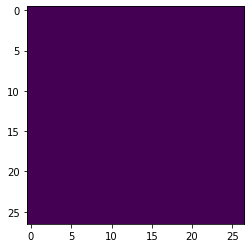

time: 25.7 s (started: 2022-04-04 15:13:26 +00:00)


In [ ]:
L = 27
spin = np.ones((L,L))
largebeta_c = fastSimulate(1000, spin, 10000)

In [ ]:
configurations.append(largebeta_c)

time: 4.4 ms (started: 2022-04-04 15:15:17 +00:00)


In [ ]:
#Computing Energies and M^2
energy_list = []
magsq_list = []

for config in configurations:
  energy_vals = np.zeros(9980)
  mag_vals = np.zeros(9980)
  for i in range(len(config)):
    c = np.copy(config[i])
    energy_vals[i] = Energy(c)
    mag_vals[i] = MagnetizationSq(c)

  energy_list.append(np.copy(energy_vals))
  magsq_list.append(np.copy(mag_vals))

#Store data
# np.save('Configs', configurations)
# np.save('Energies', energy_list)
# np.save('Magnetisations', magsq_list)


time: 2min 13s (started: 2022-04-04 15:15:53 +00:00)


In [ ]:
largebeta_E = np.zeros(9980)
largebeta_Msq = np.zeros(9980)
for j in range(len(largebeta_c)):
  c = np.copy(largebeta_c[j])
  largebeta_E[j] = Energy(c)
  largebeta_Msq[j] = MagnetizationSq(c)

time: 10.5 s (started: 2022-04-04 15:18:13 +00:00)


**Importing the stats.py functions**

In [ ]:
##from numarray import *
from numpy import *
import math

def UnweightedAvg(meanList,errorList):
    mean=sum(meanList)/(len(meanList)+0.0)
    error=0.0;
    for e in errorList:
        error=error+e*e
    error=sqrt(error)/len(errorList)
    return (mean,error)

def WeightedAvg (means, errors):
    zeroErrors = False
    for i in errors:
        if i == 0.0:
            zeroErrors = True
    
    if (not zeroErrors):
        weights = map (lambda x: 1.0/(x*x), errors)
        norm = 1.0/sum(weights)
        weights = map(lambda x: x*norm, weights)
        avg = 0.0
        error2 = 0.0
        for i in range (0,len(means)):
            avg = avg + means[i]*weights[i]
            error2 = error2 + weights[i]**2*errors[i]*errors[i]
        return (avg, math.sqrt(error2))
    else:
        return (sum(means)/len(means), 0.0)

def MeanErrorString (mean, error):
     if (mean!=0.0):
          meanDigits = math.floor(math.log(abs(mean))/math.log(10))
     else:
          meanDigits=2
     if (error!=0.0):
          rightDigits = -math.floor(math.log(error)/math.log(10))+1
     else:
          rightDigits=2
     if (rightDigits < 0):
          rightDigits = 0
     formatstr = '%1.' + '%d' % rightDigits + 'f'
     meanstr  = formatstr % mean
     errorstr = formatstr % error
     return (meanstr, errorstr)

def c(i,x,mean,var):
    N=len(x)
    if var==0:#if the variance is 0 return an effectively infinity corr
        return 1e100
#    print len(x([0:N-1])),len(x([i:N]))
    corr=1.0/var*1.0/(N-i)*sum((x[0:N-i]-mean)*(x[i:N]-mean))
    return corr
                         
def Stats(x):
    N=len(x)
    mean=sum(x)/(N+0.0)
    xSquared=x*x
    var=sum(xSquared)/(N+0.0)-mean*mean
    i=0          
    tempC=0.5
    kappa=0.0
    while (tempC>0 and i<(N-1)):
        kappa=kappa+2.0*tempC
        i=i+1
        tempC=c(i,x,mean,var) 
    if kappa == 0.0:
        kappa = 1.0
    Neff=(N+0.0)/(kappa+0.0)
    error=sqrt(var/Neff)
    return (mean,var,error,kappa)

time: 73.1 ms (started: 2022-04-15 14:54:55 +00:00)


-0.13346693386773548
0.1908479122814611


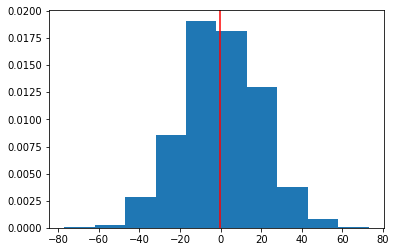

time: 275 ms (started: 2022-03-25 14:57:52 +00:00)


In [ ]:
# #Checking the limits for testing
#1. When beta = 0 : exp(-beta*E) = 1; Z = # of configurations
# Spins are random. Average E = 0

(mean, variance, error, autocorrelation) = Stats(energy_list[0])

plt.figure()
plt.hist(energy_list[0], density = True)
plt.axvline(mean, color = 'r')
print(mean)
print(error)
# E_mean_exp = np.mean(energy_list[0])
# print(E_mean_exp)

# E_zero_Error = np.std(energy_list[0])/np.sqrt(len(energy_list[0]))
# print(E_zero_Error)

0.0013622635917268364
1.8881997465020985e-05


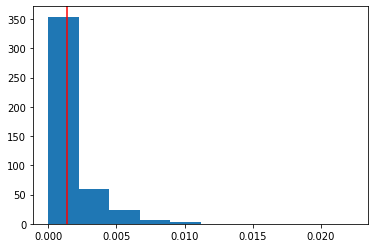

time: 370 ms (started: 2022-03-25 15:00:48 +00:00)


In [ ]:
(M_zero_mean, variance, M_zero_error, autocorrelation) = Stats(magsq_list[0])
plt.figure()

plt.hist(magsq_list[0], density = True)

plt.axvline(M_zero_mean, color = 'r')

print(M_zero_mean)
print(M_zero_error)
# M_mean_exp = np.mean(magsq_list[0])
# print(M_mean_exp)

# M_zero_Error = np.std(magsq_list[0])/np.sqrt(len(magsq_list[0]))
# print(M_zero_Error)

In [ ]:
#2. When beta = infinity, all spins are aligned.
E = Energy(np.ones((27,27)))
print(E)

-729.0
time: 5.19 ms (started: 2022-03-07 04:14:50 +00:00)


For beta =  0.1
Value of <E>:-0.13346693386773548
0.1908479122814611
For beta =  0.2
Value of <E>:-73.90701402805611
0.19773930719215424
For beta =  0.30000000000000004
Value of <E>:-156.27875751503007
0.2364708633128485
For beta =  0.4
Value of <E>:-256.44008016032063
0.35105961436437616
For beta =  0.5
Value of <E>:-401.8545090180361
1.205249530240333
For beta =  0.6000000000000001
Value of <E>:-636.0671342685371
0.587888193402501
For beta =  0.7000000000000001
Value of <E>:-695.6737474949899
0.18629156246586104
For beta =  0.8
Value of <E>:-715.8084168336674
0.09707261489767337
For beta =  0.9
Value of <E>:-723.4579158316633
0.05516282180735059
For beta =  1.0
Value of <E>:-726.6394789579158
0.03356922888688871


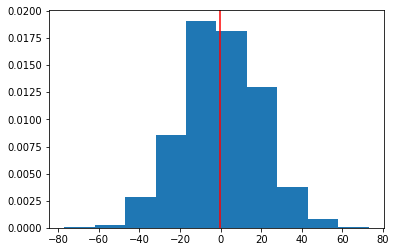

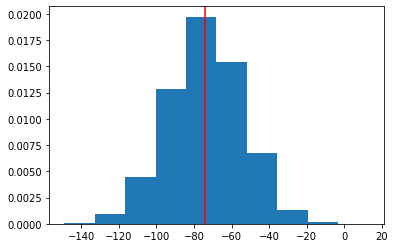

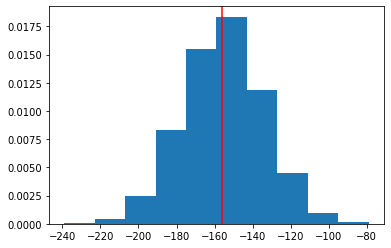

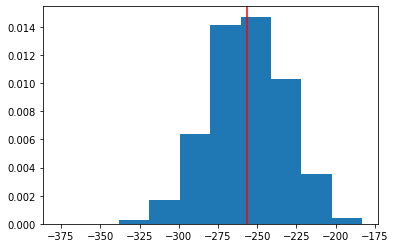

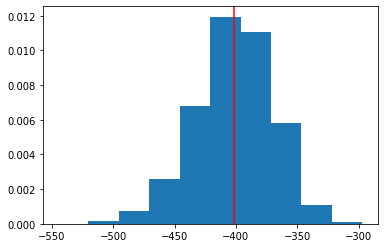

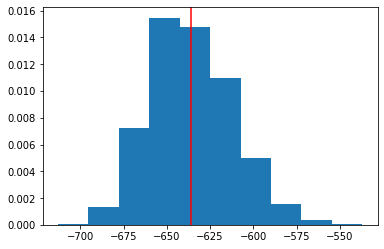

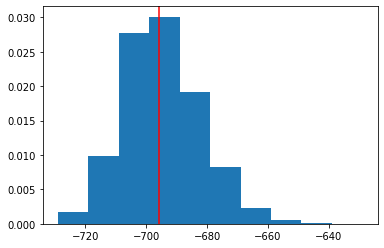

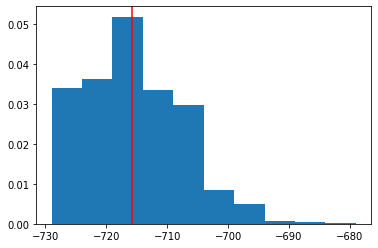

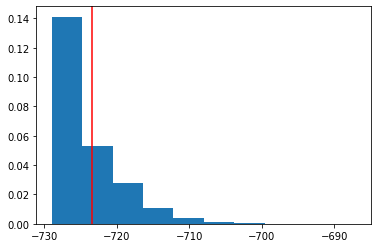

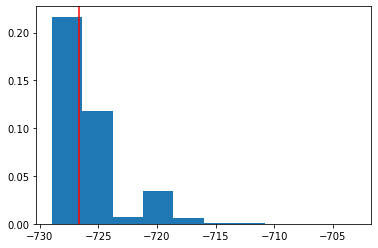

time: 3.81 s (started: 2022-03-25 15:03:38 +00:00)


In [ ]:
#Histogram of P(E), value of <E>
for i,energies in zip(beta[1:], energy_list):
  print('For beta = ', i)
  (mean, variance, error, autocorrelation) = Stats(energies)
  print('Value of <E>:' + str(mean))
  plt.figure()
  plt.hist(energies, density = True)
  plt.axvline(mean, color = 'r')
  print(error)
  # E_error = np.std(energies)/(np.sqrt(len(energies)))
  # print(E_error)

In [ ]:
print(Energy(configurations[0][980]))

-5.0


For beta =  0.1
Value of <M^2>:0.0013614113695391934
1.9057365125571563e-05
For beta =  0.2
Value of <M^2>:0.0021835267344117687
3.077853686652215e-05
For beta =  0.30000000000000004
Value of <M^2>:0.0037087193706585
5.179117370192668e-05
For beta =  0.4
Value of <M^2>:0.010157701868084986
0.00013994213323253064
For beta =  0.5
Value of <M^2>:0.08733980461840998
0.0010780084054745902
For beta =  0.6000000000000001
Value of <M^2>:0.8334273964145706
0.0005721425131863488
For beta =  0.7000000000000001
Value of <M^2>:0.9476228074703488
0.00022622213515073649
For beta =  0.8
Value of <M^2>:0.9806035617781651
0.00011937251137616085
For beta =  0.9
Value of <M^2>:0.9921374599394767
7.208579768307351e-05
For beta =  1.0
Value of <M^2>:0.9967018382911489
4.476051870246806e-05


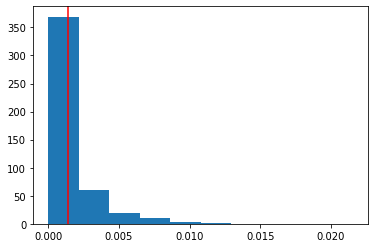

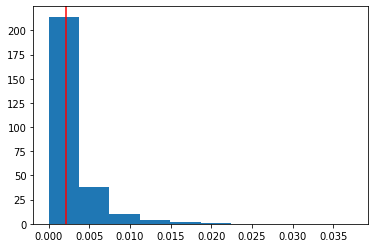

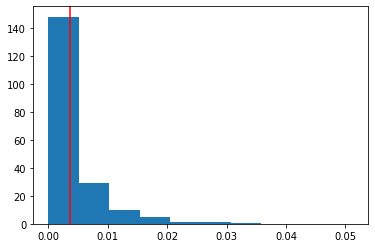

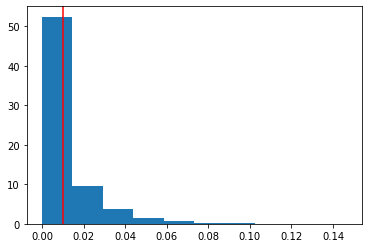

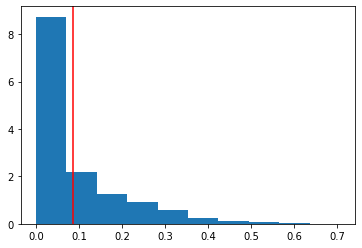

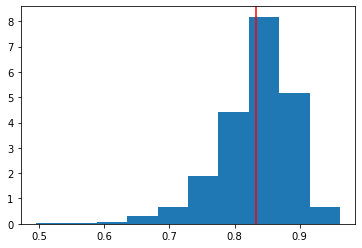

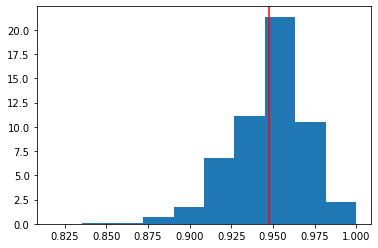

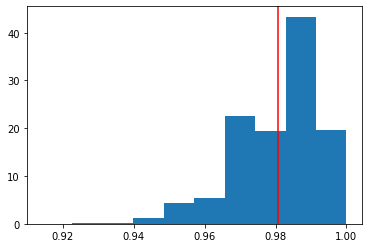

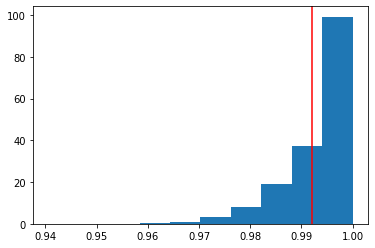

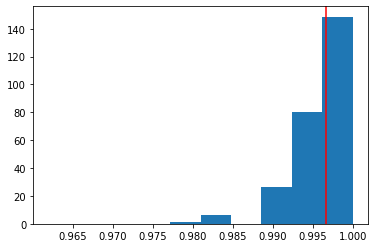

time: 4.49 s (started: 2022-03-07 04:16:14 +00:00)


In [ ]:
#Histogram of P(M^2), value of <M^2>
for i,mags in zip(beta[1:], magsq_list):
  print('For beta = ', i)
  M_mean = np.mean(mags)
  print('Value of <M^2>:' + str(M_mean))
  plt.figure()
  plt.hist(mags, density = True)
  plt.axvline(M_mean, color = 'r')

  M_error = np.std(mags)/(np.sqrt(len(mags)))
  print(M_error)

-729.0
0.9999999999999998


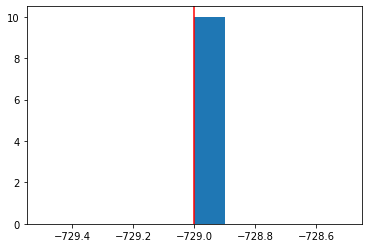

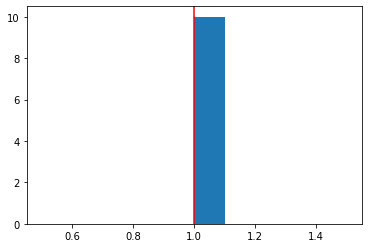

time: 1.09 s (started: 2022-03-07 04:23:37 +00:00)


In [ ]:
plt.figure(3)
plt.hist(largebeta_E, density = True)
E_avg_exp = np.mean(largebeta_E)
E_avg = Energy(np.ones((27,27)))
plt.axvline(E_avg, color = 'r')

print(E_avg_exp)

plt.figure(4)
plt.hist(largebeta_Msq, density = True)
Mag_avg = MagnetizationSq(np.ones((27,27)))
plt.axvline(Mag_avg, color = 'r')

<ErrorbarContainer object of 3 artists>

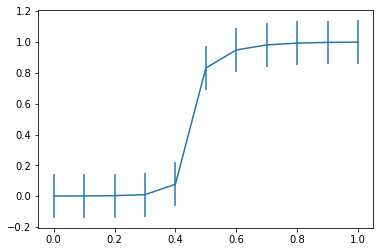

time: 217 ms (started: 2022-03-25 15:08:26 +00:00)


In [ ]:
#Graphing <M^2> as a function of beta
Magsq_avg = [np.mean(M) for M in magsq_list]
plt.figure()
#Add error bars!
betan = np.linspace(0, 1, 11)
error = np.std(Magsq_avg)/np.sqrt(len(Magsq_avg))
plt.errorbar(betan, Magsq_avg, yerr = error)

In [ ]:
from scipy.interpolate import UnivariateSpline

time: 1.7 ms (started: 2022-04-15 14:55:20 +00:00)


In [ ]:
#Graphing C_v vs T
beta = np.linspace(0.1, 1, 11)
beta = list(beta)
beta.append(10)
T = 1/beta #np.linspace(1/0.1, 1, 11)
# w = np.isnan(T)
# T[w] = float('inf')
T = T[::-1]
E = []
for e in energy_list[0:-1]:
  (mean, variance, error, autocorrelation) = Stats(e)
  E.append(mean)
# E = [np.mean(e) for e in energy_list]
plt.figure()
plt.plot(T, E, 'bo')
y = UnivariateSpline(E, T)
plt.plot(T, y(T), 'r')

In [ ]:
print(y.derivative()(T))

[ -81.74208163  -85.32844028  -99.43855922 -124.07243847 -239.96670716
 -177.08371965  -18.77151877  -16.04193972   -5.14734521   -1.74839819
   -2.1429166 ]
time: 5.21 ms (started: 2022-04-04 15:19:32 +00:00)


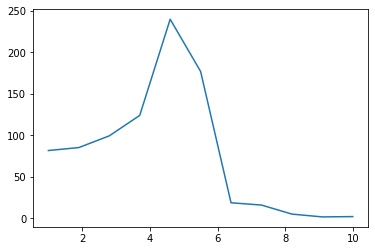

time: 518 ms (started: 2022-04-04 15:23:24 +00:00)


In [ ]:
plt.plot(T, -y.derivative()(T))

**THE RENORMALISATION GROUP**

Course Graining

In [ ]:
from scipy import stats

time: 1.23 ms (started: 2022-04-04 16:18:29 +00:00)


In [ ]:
#If Matrix is LxL:
def CoarseGrain(spins):
  L = len(spins)
  newSpins = np.zeros((int(L/3), int(L/3)))
  s = []
  for i in range(0, L-2, 3):
    for j in range(0, L-2, 3):
      block = np.copy(spins[i:i+3, j:j+3])

      #Find most common occurrence
      mode, counts = np.unique(block.flatten(), return_counts = True) 
      s.append(mode[np.argmax(counts)])

  for a in range(int(L/3)):
    for b in range(int(L/3)):
      newSpins[a,b] = s[b + int((L/3))*a]

  return newSpins

time: 11 ms (started: 2022-04-15 14:55:28 +00:00)


In [ ]:
#Testing
# spin = np.ones((9,9))
# print(spin)
# print(CoarseGrain(spin)) #L/3 = 3, L = 9

time: 1.75 ms (started: 2022-03-25 15:24:16 +00:00)


In [ ]:
#Generating snapshots to show Coarse Grain works
L = 81
x,y=np.indices((L,L))
red=np.logical_and((x+y) % 2==0   , np.logical_and(x<L-1,y<L-1))
red[L-1,L-1]=True
blue=np.logical_and((x+y) % 2==1   , np.logical_and(x<L-1,y<L-1))
green=np.logical_and((x+y) % 2==0   , np.logical_or(x==L-1,y==L-1))
green[L-1,L-1]=False
yellow=np.logical_and((x+y) % 2==1   , np.logical_or(x==L-1,y==L-1))

bJ = np.array([0.00, 0.30, 0.40, 0.42, 0.44, 0.46, 0.48, 0.50, 0.60, float('inf')])

config_list = []

for b in bJ:
  spin = np.ones((L,L))
  coarse_sim = fastSimulate(b, spin, 10000)
  config_list.append(coarse_sim)

<Figure size 432x288 with 0 Axes>

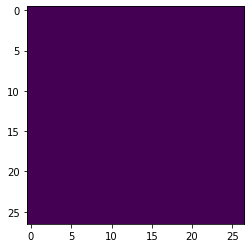

time: 17.4 s (started: 2022-04-04 16:12:47 +00:00)


In [ ]:
L = 27
x,y=np.indices((L,L))
red=np.logical_and((x+y) % 2==0   , np.logical_and(x<L-1,y<L-1))
red[L-1,L-1]=True
blue=np.logical_and((x+y) % 2==1   , np.logical_and(x<L-1,y<L-1))
green=np.logical_and((x+y) % 2==0   , np.logical_or(x==L-1,y==L-1))
green[L-1,L-1]=False
yellow=np.logical_and((x+y) % 2==1   , np.logical_or(x==L-1,y==L-1))

spin = np.ones((27,27))
plt.figure()
plt.imshow(fastSimulate(float('inf'), spin, 10000)[-1])

<Figure size 432x288 with 0 Axes>

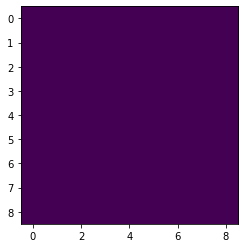

time: 7.7 s (started: 2022-04-04 16:13:17 +00:00)


In [ ]:
L = 9
x,y=np.indices((L,L))
red=np.logical_and((x+y) % 2==0   , np.logical_and(x<L-1,y<L-1))
red[L-1,L-1]=True
blue=np.logical_and((x+y) % 2==1   , np.logical_and(x<L-1,y<L-1))
green=np.logical_and((x+y) % 2==0   , np.logical_or(x==L-1,y==L-1))
green[L-1,L-1]=False
yellow=np.logical_and((x+y) % 2==1   , np.logical_or(x==L-1,y==L-1))

spin = np.ones((9,9))
plt.figure()
plt.imshow(fastSimulate(float('inf'), spin, 10000)[-1])

For beta =  0.0
Single Coarse grained Config:
Double Coarse grained Config:
For beta =  0.3
Single Coarse grained Config:
Double Coarse grained Config:
For beta =  0.4
Single Coarse grained Config:
Double Coarse grained Config:
For beta =  0.5
Single Coarse grained Config:
Double Coarse grained Config:
For beta =  0.6
Single Coarse grained Config:
Double Coarse grained Config:
For beta =  inf
Single Coarse grained Config:
Double Coarse grained Config:


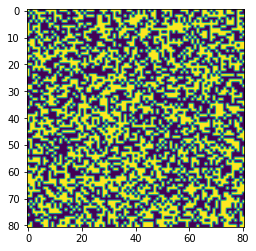

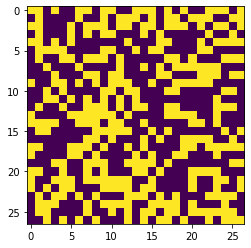

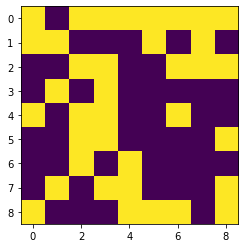

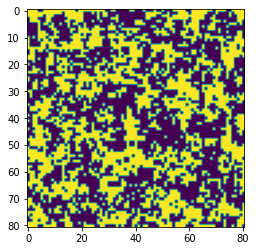

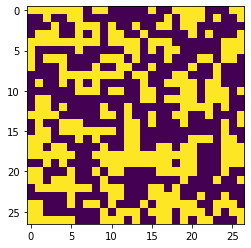

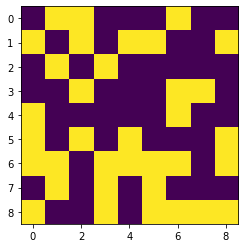

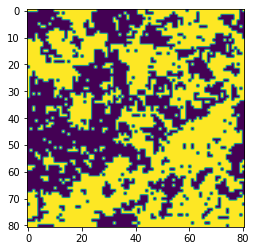

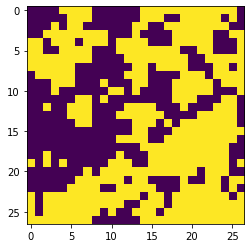

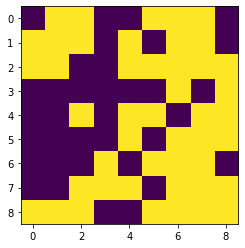

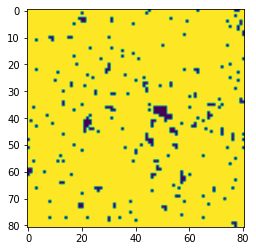

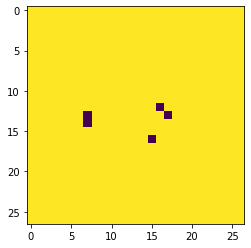

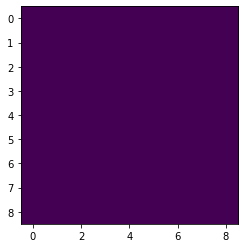

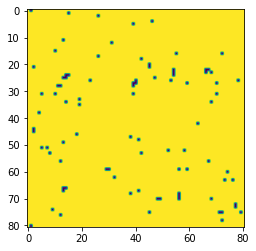

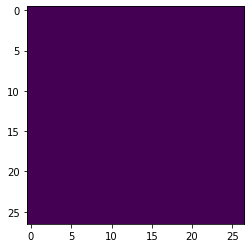

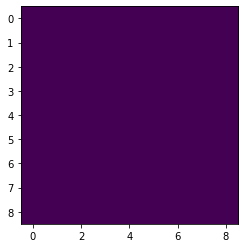

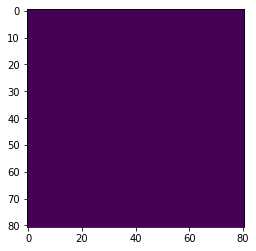

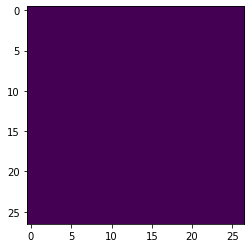

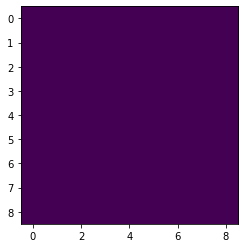

time: 3.65 s (started: 2022-04-04 16:22:12 +00:00)


In [ ]:
#Converting to Coarse Grain:
for i in range(len(bJ)):
  print('For beta = ', bJ[i])
  plt.figure()
  plt.imshow(config_list[i][-1])
  singlecoarse = CoarseGrain(config_list[i][-1])
  print('Single Coarse grained Config:')
  plt.figure()
  plt.imshow(singlecoarse)
  doublecoarse = CoarseGrain(singlecoarse)
  print('Double Coarse grained Config:')
  plt.figure()
  plt.imshow(doublecoarse)

In [ ]:
np.save('ConfigList81x81', config_list)

time: 16 s (started: 2022-03-06 20:10:59 +00:00)


For beta =  0.0
Single Coarse grained Config:
Double Coarse grained Config:
For beta =  0.0
Single Coarse grained Config:
Double Coarse grained Config:
For beta =  0.3
Single Coarse grained Config:
Double Coarse grained Config:
For beta =  0.4
Single Coarse grained Config:
Double Coarse grained Config:
For beta =  0.5
Single Coarse grained Config:
Double Coarse grained Config:
For beta =  0.6
Single Coarse grained Config:
Double Coarse grained Config:
For beta =  inf


IndexError: ignored

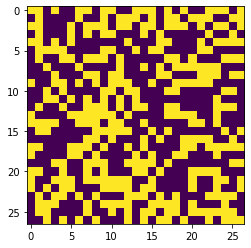

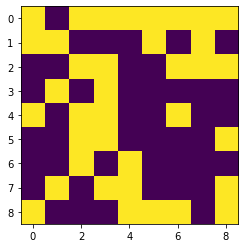

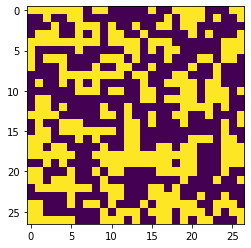

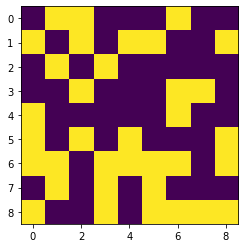

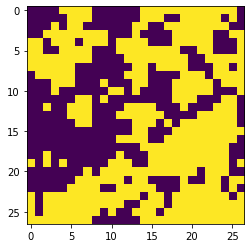

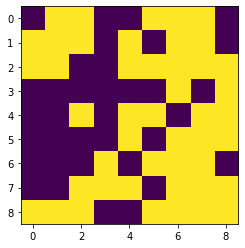

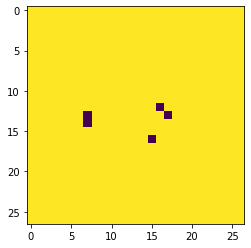

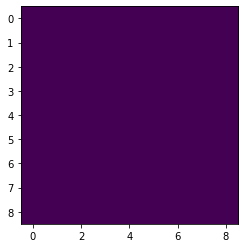

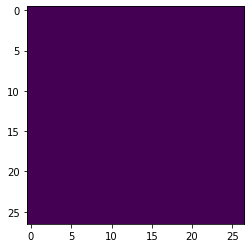

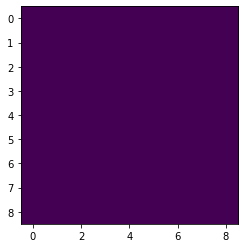

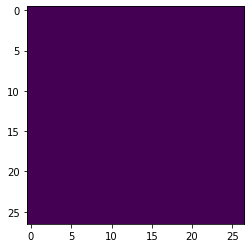

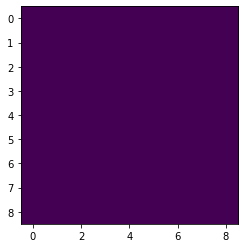

time: 2.27 s (started: 2022-04-04 16:22:21 +00:00)


In [ ]:
#Converting to Coarse Grain:
bJ = np.array([0,0, 0.3, 0.40, 0.42, 0.44, 0.46, 0.48, 0.5, 0.6, float('inf')])
for i in range(len(bJ)):
  print('For beta = ', bJ[i])
  # plt.imshow(config_list[i][-1])
  singlecoarse = CoarseGrain(config_list[i][-1])
  print('Single Coarse grained Config:')
  plt.figure()
  plt.imshow(singlecoarse)
  doublecoarse = CoarseGrain(singlecoarse)
  print('Double Coarse grained Config:')
  plt.figure()
  plt.imshow(doublecoarse)

## **Using Fast Simulate to find the Coarse Grain models**

In [ ]:
#Computes delE and implements MonteCarlo in itself.
def coarsefastSimulate(b, spins, sweeps):
  ctr = 0
  config = [np.eye(len(spins))]*(sweeps - 20)
  s = spins
  for sweep in range(sweeps):
    #For green:
    gtoFlip=1.0/(1.0+1.0/np.exp(-b*delE_fast(s, green)))<np.random.random(np.shape(np.exp(-b*delE_fast(s, green))))
    gtoFlip_int = [-1 if x == True else 1 for x in gtoFlip]
    s[green] = gtoFlip_int*s[green]
    
    #For red:
    rtoFlip=1.0/(1.0+1.0/np.exp(-b*delE_fast(s, red)))<np.random.random(np.shape(np.exp(-b*delE_fast(s, red))))
    rtoFlip_int = [-1 if x == True else 1 for x in rtoFlip]
    s[red] = rtoFlip_int*s[red]

    #For yellow:
    ytoFlip=1.0/(1.0+1.0/np.exp(-b*delE_fast(s, yellow)))<np.random.random(np.shape(np.exp(-b*delE_fast(s, yellow))))
    ytoFlip_int = [-1 if x == True else 1 for x in ytoFlip]
    s[yellow] = ytoFlip_int*s[yellow]

    #For blue:
    btoFlip=1.0/(1.0+1.0/np.exp(-b*delE_fast(s, blue)))<np.random.random(np.shape(np.exp(-b*delE_fast(s, blue))))
    btoFlip_int = [-1 if x == True else 1 for x in btoFlip]
    s[blue] = btoFlip_int*s[blue]

    if(ctr >= 20):
      coarse = CoarseGrain(np.copy(s))
      config[ctr-20] = np.copy(coarse)

    ctr = ctr+1

  return config

time: 32.1 ms (started: 2022-04-15 14:56:43 +00:00)


In [ ]:
#Matching Coarse Grained <M^2> with Native Model <M^2>
#1. NxN model L = 81
L = 81
x,y=np.indices((L,L))
red=np.logical_and((x+y) % 2==0   , np.logical_and(x<L-1,y<L-1))
red[L-1,L-1]=True
blue=np.logical_and((x+y) % 2==1   , np.logical_and(x<L-1,y<L-1))
green=np.logical_and((x+y) % 2==0   , np.logical_or(x==L-1,y==L-1))
green[L-1,L-1]=False
yellow=np.logical_and((x+y) % 2==1   , np.logical_or(x==L-1,y==L-1))

bJ = np.array([0.00, 0.30, 0.35, 0.40, 0.42, 0.44, 0.46, 0.48, 0.50, 0.60, float('inf')])
simN_list = []

for b1 in bJ:
  spin = np.ones((L,L))
  sim_N = coarsefastSimulate(b1, spin, 1000)
  simN_list.append(np.copy(sim_N))

time: 5min 49s (started: 2022-04-15 15:23:18 +00:00)


In [ ]:
np.save('N_sim.npy', simN_list)

time: 95.3 ms (started: 2022-04-15 15:29:11 +00:00)


In [ ]:
# simN_list = np.load('N_sim.npy')

time: 1.14 ms (started: 2022-04-15 15:29:15 +00:00)


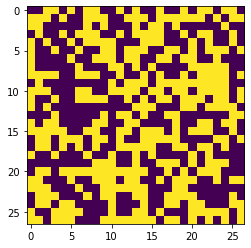

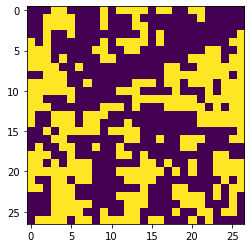

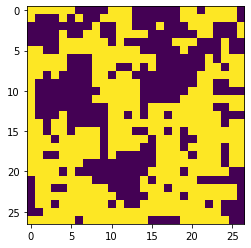

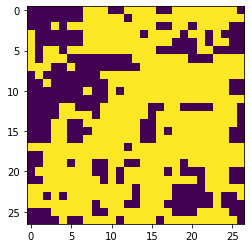

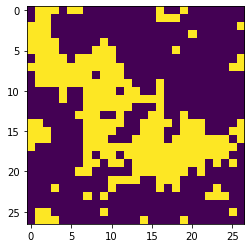

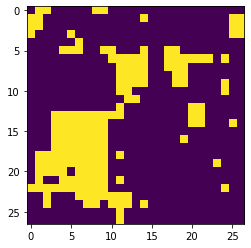

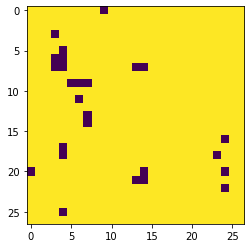

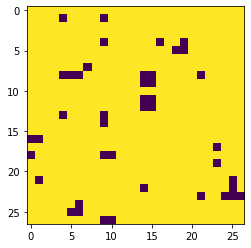

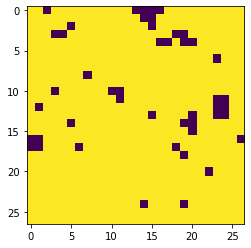

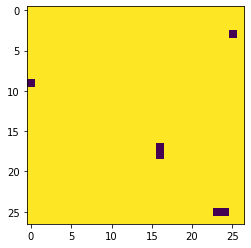

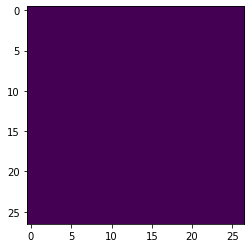

time: 24.5 s (started: 2022-04-15 15:22:21 +00:00)


In [ ]:
L = 27
x,y=np.indices((L,L))
red=np.logical_and((x+y) % 2==0   , np.logical_and(x<L-1,y<L-1))
red[L-1,L-1]=True
blue=np.logical_and((x+y) % 2==1   , np.logical_and(x<L-1,y<L-1))
green=np.logical_and((x+y) % 2==0   , np.logical_or(x==L-1,y==L-1))
green[L-1,L-1]=False
yellow=np.logical_and((x+y) % 2==1   , np.logical_or(x==L-1,y==L-1))

bJ = np.array([0.00, 0.30, 0.35, 0.40, 0.42, 0.44, 0.46, 0.48, 0.50, 0.60, float('inf')])
simC_list = []

for b2 in bJ:
  spin2 = np.ones((L,L))
  sim_coarse = fastSimulate(b2, spin2, 1000)
  simC_list.append(np.copy(sim_coarse))

In [ ]:
np.save('CSim.npy', simC_list)

time: 99.4 ms (started: 2022-04-15 15:29:26 +00:00)


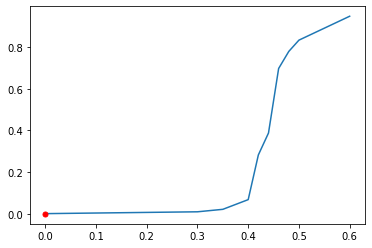

time: 375 ms (started: 2022-04-15 15:29:27 +00:00)


In [ ]:
M_avg = np.zeros(len(simC_list))
for j, coarse in enumerate(simC_list):
  mag = np.zeros(980)
  for i in range(len(coarse)):
      mag[i] = MagnetizationSq(np.copy(coarse[i]))
  
  (mean, variance, error, autocorrelation) = Stats(mag)
  M_avg[j] = mean

plt.figure()
plt.plot(bJ, M_avg)
plt.plot([0], [0], 'r', marker = "o", markersize = 5)

In [ ]:
NM_avg = np.zeros(len(simN_list))

for k,config_N in enumerate(simN_list):
  magN_vals = np.zeros(980)
  for i in range(len(config_N)):
    magN_vals[i] = MagnetizationSq(np.copy(config_N[i]))

  (mean, variance, error, autocorrelation) = Stats(magN_vals)
  NM_avg[k] = np.mean(magN_vals)

time: 171 ms (started: 2022-04-15 15:29:28 +00:00)


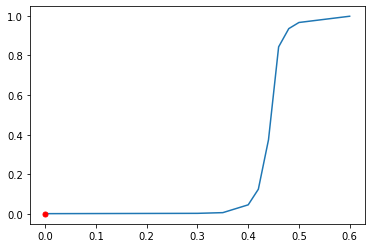

time: 239 ms (started: 2022-04-15 15:29:30 +00:00)


In [ ]:
plt.figure()
plt.plot(bJ, NM_avg)
plt.plot([0], [0], 'r', marker = "o", markersize = 5)

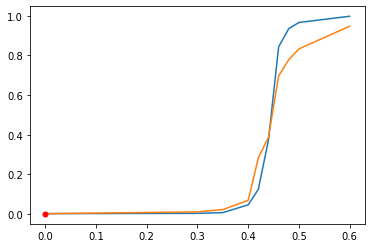

time: 253 ms (started: 2022-04-15 15:29:31 +00:00)


In [ ]:
plt.figure()
plt.plot(bJ, NM_avg, bJ, M_avg)
plt.plot([0],[0], 'r', marker="o", markersize=5)

# **Calculating R(J)**

Use interpolation (scipy.interpolate.interp1d) to get βJ as a function of <M^2>

In [ ]:
import scipy.interpolate

time: 1.45 ms (started: 2022-04-15 15:29:35 +00:00)


In [ ]:
#Interpolating the native curve
x = NM_avg
y = np.linspace(0, 1, len(NM_avg))
f = scipy.interpolate.interp1d(x, y,fill_value="extrapolate")

time: 2.75 ms (started: 2022-04-15 16:05:44 +00:00)


In [ ]:
#x,y is our J; xnew, ynew is our R(J)
xnew = M_avg
ynew = f(xnew)


time: 5.42 ms (started: 2022-04-15 16:05:45 +00:00)


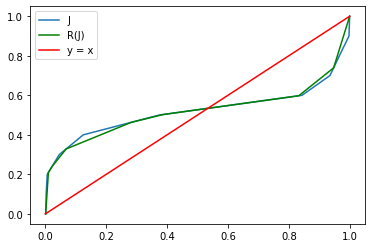

time: 290 ms (started: 2022-04-15 16:05:45 +00:00)


In [ ]:
#Plotting R(J) vs J
plt.figure()
plt.plot(x,y, label = "J")
plt.plot(xnew, ynew, 'g-', label = "R(J)")
plt.plot([0,1], [0,1], 'r', label = "y = x")
plt.legend()

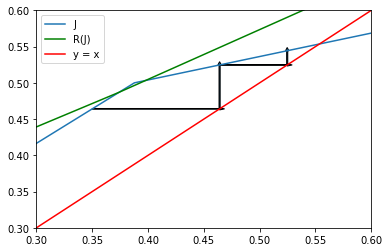

time: 197 ms (started: 2022-04-15 16:01:59 +00:00)


In [ ]:
plt.figure()
plt.plot(x,y, label = "J")
plt.plot(xnew, ynew, 'g-', label = "R(J)")
plt.plot([0,1], [0,1], 'r', label = "y = x")

#Plotting arrows for J = 0.35
plt.arrow(0.35, f(0.35), f(0.35) - 0.35, 0)
plt.arrow(f(0.35), f(0.35), 0, f(f(0.35)) - f(0.35))

plt.arrow(f(0.35), f(f(0.35)), f(f(0.35)) - f(0.35), 0)
plt.arrow(f(f(0.35)), f(f(0.35)), 0, f(f(f(0.35))) - f(f(0.35)))
plt.xlim(0.3, 0.6)
plt.ylim(0.3, 0.6)
plt.legend() 

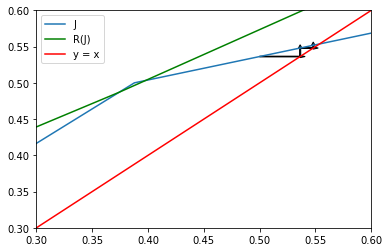

time: 211 ms (started: 2022-04-15 16:02:01 +00:00)


In [ ]:
plt.figure()
plt.plot(x,y, label = "J")
plt.plot(xnew, ynew, 'g-', label = "R(J)")
plt.plot([0,1], [0,1], 'r', label = "y = x")

#Plotting for J = 0.5
plt.arrow(0.5, f(0.5), f(0.5) - 0.5, 0)
plt.arrow(f(0.5), f(0.5), 0, f(f(0.5)) - f(0.5))

plt.arrow(f(0.5), f(f(0.5)), f(f(0.5)) - f(0.5), 0)
plt.arrow(f(f(0.5)), f(f(0.5)), 0, f(f(f(0.5))) - f(f(0.5)))
plt.xlim(0.3, 0.6)
plt.ylim(0.3, 0.6)
plt.legend() 

# **Finding the Critical Exponent**

In [ ]:
import math

time: 1.37 ms (started: 2022-04-15 16:02:03 +00:00)


In [ ]:
#Finding the slope:
# slope = (f(0.44)-f(0.42))/(0.44 - 0.42)
slope, intercept = np.polyfit(xnew,f(xnew),1)
print(slope)

scale = 3
crit_exp = np.log(3)/np.log(slope)
print("Critical Exponent is:", crit_exp)

0.8805490956447923
Critical Exponent is: -8.636237692907264
time: 14.9 ms (started: 2022-04-15 16:02:19 +00:00)


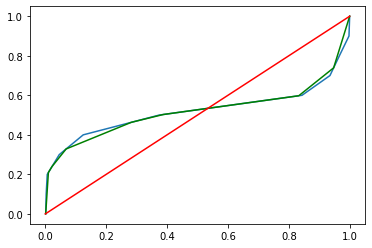

time: 356 ms (started: 2022-04-15 15:50:13 +00:00)


In [ ]:
plt.figure()
plt.plot(x,y, label = "J")
plt.plot(xnew, ynew, 'g-', label = "R(J)")
plt.plot([0,1], [0,1], 'r', label = "y = x")